In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df =pd.read_excel('/content/Data TBC opstat.xlsx')
df

,Kabupaten/Kota,Y,X1,X2,X3,X4,X5,X6,X7,X8,...,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
0,Bogor,12153,3750,26,101,6918,797,12537,751,474.7,...,435,396.53,1444.34,5556.31,2710.62,2589167,10.64,71.20,2897332,12.50
1,Sukabumi,4828,2142,9,58,3655,146,5594,177,186.3,...,386,351.54,292.64,2775.31,4145.70,1211763,7.77,67.64,1313905,12.25
2,Cianjur,4746,2481,5,47,3616,582,3039,219,246.8,...,360,457.22,453.24,2529.81,3840.16,1119786,8.41,65.94,1222589,12.01
3,Bandung,5839,4444,11,62,3186,343,8605,502,258.6,...,280,559.62,401.85,3687.25,1767.96,1682510,6.98,73.16,1808799,12.71
4,Garut,4855,3339,7,67,4287,482,8411,212,276.7,...,442,330.21,223.24,2648.95,3074.07,1229218,7.60,67.41,1330353,12.15
5,Tasikmalaya,2130,1940,1,40,2189,125,4032,86,194.1,...,351,130.02,130.02,1892.22,2551.19,901466,4.17,66.84,940713,12.59
6,Ciamis,1664,8539,5,37,2033,174,2174,106,94.0,...,265,151.74,147.20,1243.32,1414.71,639600,3.75,71.45,664523,14.28
7,Kuningan,1726,2540,11,37,2441,302,2877,165,140.3,...,376,262.64,262.00,1189.01,1110.56,478750,9.81,70.16,530825,12.24
8,Cirebon,3472,1826,10,60,4701,549,8438,340,266.1,...,424,235.00,200.00,2331.36,984.52,1020411,8.11,70.06,1110529,12.28
9,Majalengka,1744,1600,3,32,2627,386,2452,168,147.1,...,343,155.60,114.00,1328.01,1204.24,617320,4.16,68.56,644128,12.24


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Kabupaten/Kota  27 non-null     object 
 1   Y               27 non-null     int64  
 2   X1              27 non-null     int64  
 3   X2              27 non-null     int64  
 4   X3              27 non-null     int64  
 5   X4              27 non-null     int64  
 6   X5              27 non-null     int64  
 7   X6              27 non-null     int64  
 8   X7              27 non-null     int64  
 9   X8              27 non-null     float64
 10  X9              27 non-null     int64  
 11  X10             27 non-null     int64  
 12  X11             27 non-null     int64  
 13  X12             27 non-null     float64
 14  X13             27 non-null     float64
 15  X14             27 non-null     float64
 16  X15             27 non-null     float64
 17  X16             27 non-null     int64

# Eksplorasi Data

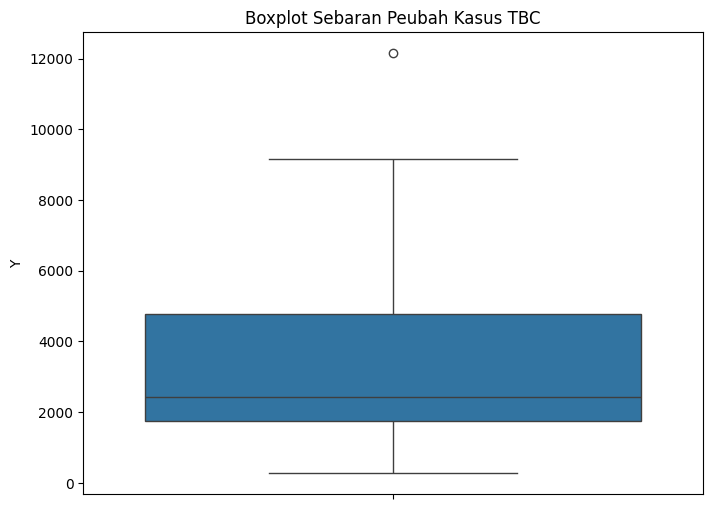

In [ ]:
# prompt: buatkan boxplot sebaran peubah Y

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Y '])
plt.title("Boxplot Sebaran Peubah Kasus TBC")
plt.ylabel("Y")
plt.show()

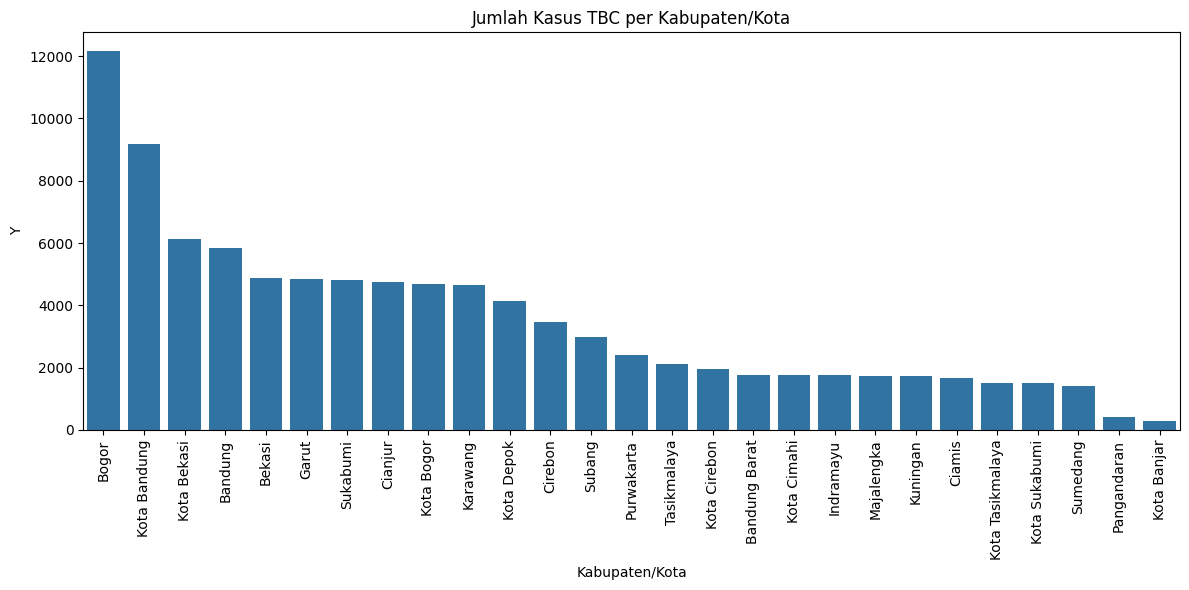

In [ ]:
# prompt: Buatkan barchart peubah Y di tiap kabupaten kota urutkan dari yg terbesar

import matplotlib.pyplot as plt
df_sorted = df.sort_values(by='Y ', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Kabupaten/Kota', y='Y ', data=df_sorted)
plt.title('Jumlah Kasus TBC per Kabupaten/Kota')
plt.xlabel('Kabupaten/Kota')
plt.ylabel('Y')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
df = df.drop(columns=['Kabupaten/Kota'])

In [ ]:
Y_asli = df['Y '].copy()
X_asli = df.drop(columns=['Y ']).copy()

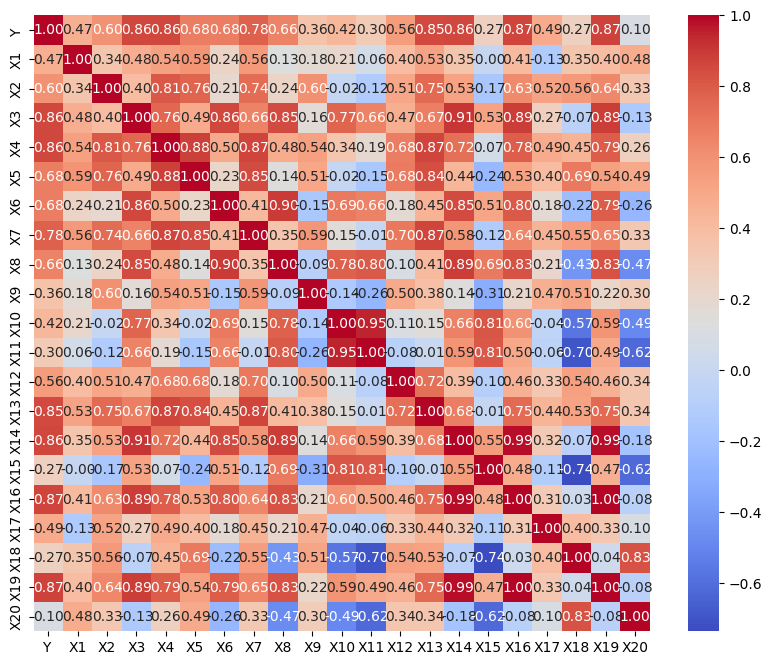

In [ ]:
# Hitung korelasi
correlation_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("")
plt.show()


# Regresi OLS

In [ ]:
# Tambahkan konstanta
import statsmodels.api as sm
X_const = sm.add_constant(X_asli)

# Fit model regresi
model = sm.OLS(Y_asli, X_const).fit()

# Tampilkan ringkasan
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     Y    R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     19.26
Date:                Sun, 01 Jun 2025   Prob (F-statistic):           0.000715
Time:                        11:27:41   Log-Likelihood:                -194.47
No. Observations:                  27   AIC:                             430.9
Df Residuals:                       6   BIC:                             458.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.483e+04   1.83e+04      1.908      0.1

In [ ]:
from sklearn.metrics import mean_squared_error

# Prediksi nilai Y menggunakan model
Y_pred = model.predict(X_const)

# Hitung MSE
mse = mean_squared_error(Y_asli, Y_pred)

print("MSE:", mse)



MSE: 105623.39883478876


## Cek Multikolinearitas

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Tambahkan konstanta (intercept)
X_const = add_constant(X_asli)

# Hitung VIF untuk setiap kolom
vif_df = pd.DataFrame()
vif_df['Variable'] = X_const.columns
vif_df['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif_df)

   Variable           VIF
0     const  18924.215860
1        X1      5.674850
2        X2     18.232592
3        X3    176.566294
4        X4     41.671238
5        X5     22.351908
6        X6     26.037427
7        X7     26.118930
8        X8    123.361525
9        X9      8.682933
10      X10     84.148860
11      X11     41.087448
12      X12     10.995260
13      X13     36.016824
14      X14    297.818738
15      X15     23.907931
16      X16  25960.246643
17      X17     27.003306
18      X18    109.116807
19      X19  23183.085022
20      X20      7.509534


## Asumsi Normalitas

In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(model.resid)
print(f'Shapiro-Wilk Test: statistic={stat}, p-value={p}')


Shapiro-Wilk Test: statistic=0.9767229961737854, p-value=0.7820827281535014


## Asumsi Heterokesdatisitas

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value']
print(dict(zip(labels, bp_test)))


{'Lagrange multiplier statistic': np.float64(15.824505347612547), 'p-value': np.float64(0.7274502262311958)}


## Asumsi Autokorelasi Sisaan

In [ ]:
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(model.resid)
print(f'Durbin-Watson statistic: {dw}')


Durbin-Watson statistic: 2.096421447630859


In [ ]:
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

bg_test = acorr_breusch_godfrey(model, nlags=1)  # nlags = 1 untuk autokorelasi lag-1
labels = ['LM stat', 'LM p-value']
print(dict(zip(labels, bg_test)))


{'LM stat': np.float64(1.858960883139188), 'LM p-value': np.float64(0.17274477715766406)}


# Standarisasi Peubah

In [ ]:
X = df.drop(columns='Y ')
Y = df['Y ']
# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Regresi Lasso

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold

In [ ]:
# Model LassoCV (default pakai coordinate descent)
lasso_cv = LassoCV(cv=(KFold(n_splits=10, shuffle=True, random_state=42)), random_state=42)
lasso_cv.fit(X_scaled, Y)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26863.493630482815, tolerance: 15017.020600000007
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68240.85851175059, tolerance: 15017.020600000007
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85062.47649883851, tolerance: 15017.020600000007
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: Convergenc

LassoCV(cv=KFold(n_splits=10, random_state=42, shuffle=True), random_state=42)

In [ ]:
# Menampilkan alpha (lambda) terbaik
print("Alpha terbaik (lambda):", lasso_cv.alpha_)

Alpha terbaik (lambda): 150.89463717178117


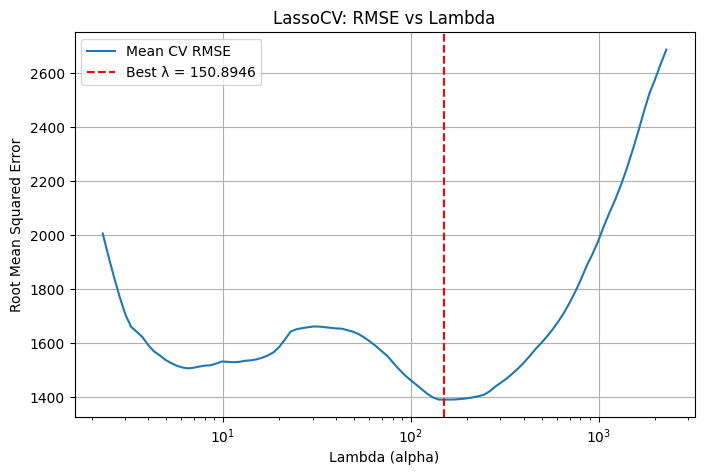

In [ ]:
plt.figure(figsize=(8, 5))
rmse = np.sqrt(lasso_cv.mse_path_.mean(axis=1))
plt.semilogx(lasso_cv.alphas_, rmse, label='Mean CV RMSE')
plt.axvline(lasso_cv.alpha_, color='red', linestyle='--', label=f'Best λ = {lasso_cv.alpha_:.4f}')
plt.xlabel('Lambda (alpha)')
plt.ylabel('Root Mean Squared Error')
plt.title('LassoCV: RMSE vs Lambda')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
mse_cv = lasso_cv.mse_path_  # shape: (n_alphas, n_folds)
rmse_cv = np.sqrt(mse_cv)  # elemen-wise sqrt, hasilnya (n_alphas, n_folds)
mean_rmse_per_alpha = rmse_cv.mean(axis=1)  # shape: (n_alphas,)
best_alpha_idx = np.where(lasso_cv.alphas_ == lasso_cv.alpha_)[0][0]
best_alpha_rmse = mean_rmse_per_alpha[best_alpha_idx]
print(f"Mean RMSE at best alpha ({lasso_cv.alpha_:.4f}): {best_alpha_rmse:.4f}")

Mean RMSE at best alpha (150.8946): 1128.7498


In [ ]:
# Prediksi
y_pred = lasso_cv.predict(X_scaled)

# MSE
mse = mean_squared_error(Y, y_pred)

# RMSE
rmse = np.sqrt(mean_squared_error(Y, y_pred))

# R^2 dan Adjusted R^2
r2 = r2_score(Y, y_pred)
n = X.shape[0]  # jumlah observasi
p = np.sum(lasso_cv.coef_ != 0)  # jumlah prediktor terpilih
adj_r2 = 1 - (1 - r2)*(n - 1)/(n - p - 1)


In [ ]:
print("Best Lambda (α):", lasso_cv.alpha_)
print("Koefisien:", lasso_cv.coef_)
print("Intercept:", lasso_cv.intercept_)
print("MSE:", mse)
print("RMSE:", rmse)
print("R^2:", r2)
print("Adjusted R^2:", adj_r2)


Best Lambda (α): 150.89463717178117
Koefisien: [  0.          -0.         784.18345495 233.16655981   0.
   0.           0.           0.          11.69449444  -0.
  -0.           0.         877.12871732 547.74063885   0.
   0.         240.36532545   0.           0.           0.        ]
Intercept: 3503.7407407407413
MSE: 653545.4411111289
RMSE: 808.4215738778431
R^2: 0.9051221824462292
Adjusted R^2: 0.876658837180098


## Koef Asli

In [ ]:
# Koefisien standar dari model
coef_standard = lasso_cv.coef_

# Intersep standar dari model
intercept_standard = lasso_cv.intercept_

# Skala fitur: simpan mean dan std dari scaler
X_means = scaler.mean_
X_stds = scaler.scale_

# Mengembalikan koefisien ke skala asli
coef_original = coef_standard / X_stds

# Mengembalikan intersep ke skala asli
intercept_original = intercept_standard - np.sum(X_means * coef_original)

print("Koefisien (skala asli):", coef_original)
print("Intersep (skala asli):", intercept_original)

Koefisien (skala asli): [ 0.00000000e+00 -0.00000000e+00  3.73551434e+01  1.21582343e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  5.83203832e-04 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  2.29295118e+00  4.64561194e-01  0.00000000e+00  0.00000000e+00
  1.05038064e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00]
Intersep (skala asli): -1048.1416643594343


In [ ]:
# Tampilkan hasil
for name, coef in zip(X_asli.columns, coef_original):
    print(f"{name}: {coef:.5f}")
print("Intercept:", intercept_original)

X1: 0.00000
X2: -0.00000
X3: 37.35514
X4: 0.12158
X5: 0.00000
X6: 0.00000
X7: 0.00000
X8: 0.00000
X9: 0.00058
X10: -0.00000
X11: -0.00000
X12: 0.00000
X13: 2.29295
X14: 0.46456
X15: 0.00000
X16: 0.00000
X17: 105.03806
X18: 0.00000
X19: 0.00000
X20: 0.00000
Intercept: -1048.1416643594343


In [ ]:
# Prediksi manual dengan koefisien asli
y_pred_manual = intercept_original + np.dot(X_asli, coef_original)

# MSE
mse = mean_squared_error(Y, y_pred_manual)

# RMSE
rmse = np.sqrt(mse)

# Evaluasi R-squared
r2 = r2_score(Y, y_pred_manual)
n = X.shape[0]  # jumlah observasi
p = np.sum(coef_original != 0)  # jumlah prediktor terpilih
adj_r2 = 1 - (1 - r2)*(n - 1)/(n - p - 1)

In [ ]:
print("MSE:", mse)
print("RMSE:", rmse)
print("R^2:", r2)
print("Adjusted R^2:", adj_r2)

MSE: 653545.441111129
RMSE: 808.4215738778431
R^2: 0.9051221824462292
Adjusted R^2: 0.876658837180098


# Regresi Lasso SGD

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd

In [ ]:
# Inisialisasi SGD dengan kendala L1
sgd = SGDRegressor(penalty='l1', random_state=42)

In [ ]:
# Tuning hyperparameter
param_grid = {
    'alpha': np.arange(1, 301, 1),           # Regularisasi L1
     'eta0': [0.001, 0.01, 0.1],            # Learning rate awal
    'learning_rate': ['constant', 'invscaling', 'optimal'],
    'max_iter': [500, 1000, 2000],
}

In [ ]:
grid = GridSearchCV(sgd, param_grid, cv=(KFold(n_splits=10, shuffle=True, random_state=42)), scoring='neg_root_mean_squared_error', n_jobs=-1)
grid.fit(X_scaled, Y)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=SGDRegressor(penalty='l1', random_state=42), n_jobs=-1,
             param_grid={'alpha': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  6...
       248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260,
       261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273,
       274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286,
       287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299,
       300]),
                         'eta0': [0.001, 0.01, 0.1],
                         'learning_rate': ['constant', 'invscaling', 'optimal'],
                         'max_iter': [500, 1000, 2000]},
             scoring='neg_root_mean_squared_error')

In [ ]:
# Evaluasi model terbaik
best_model = grid.best_estimator_
y_pred = best_model.predict(X_scaled)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'alpha': np.int64(209), 'eta0': 0.1, 'learning_rate': 'invscaling', 'max_iter': 500}


In [ ]:
best_rmse = -grid.best_score_
print(f'Best RMSE dari CV: {best_rmse:.4f}')

Best RMSE dari CV: 1054.3503


In [ ]:
# Ambil hasil grid search dalam bentuk DataFrame
results_df = pd.DataFrame(grid.cv_results_)

# Filter hanya baris dengan kombinasi hyperparameter tertentu jika ingin
# Tapi di sini kita ambil semua dan plot terhadap alpha

# Kelompokkan berdasarkan alpha, ambil RMSE rata-rata
grouped = results_df.groupby('param_alpha')['mean_test_score'].mean()

# Ubah jadi RMSE positif
alphas = grouped.index.astype(float)
rmse_scores = -grouped.values  # neg_root_mean_squared_error → balik ke positif

# Cari alpha terbaik
best_alpha = grid.best_params_['alpha']
best_rmse = -grid.best_score_

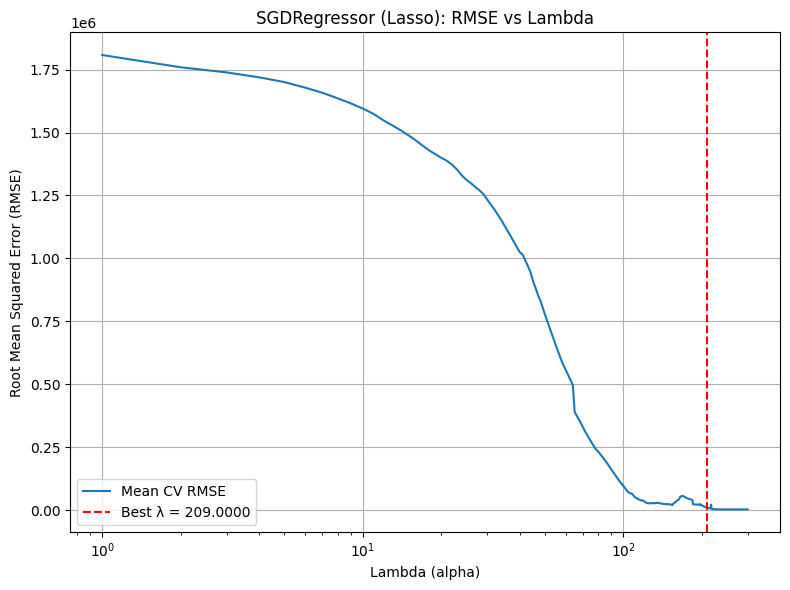

In [ ]:
# Plot
plt.figure(figsize=(8, 6))
plt.plot(alphas, rmse_scores, label='Mean CV RMSE')
plt.axvline(best_alpha, color='red', linestyle='--', label=f'Best λ = {best_alpha:.4f}')
plt.xscale('log')
plt.xlabel('Lambda (alpha)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('SGDRegressor (Lasso): RMSE vs Lambda')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
coef = best_model.coef_
intersep = best_model.intercept_
print("Koefisien:", coef)
print("Intercept:", intersep)

Koefisien: [   0.            0.         1031.60310242   11.68521354    0.
   41.82115243    0.            0.           27.28690025    0.
    0.            0.         1051.35143877  258.24045177    0.
   64.19499233  285.18273861    0.          293.36889587    0.        ]
Intercept: [3556.17478921]


In [ ]:
# MSE
mse = mean_squared_error(Y, y_pred)

# RMSE
rmse = np.sqrt(mse)

# MAE
mae = mean_absolute_error(Y, y_pred)

# R^2 dan Adjusted R^2
r2 = r2_score(Y, y_pred)
n = X.shape[0]  # jumlah observasi
p = np.sum(coef != 0)  # jumlah prediktor terpilih
adj_r2 = 1 - (1 - r2)*(n - 1)/(n - p - 1)

In [ ]:
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r2)
print("Adjusted R^2:", adj_r2)

MSE: 671550.2513808082
RMSE: 819.4816967942653
MAE: 648.5926208512693
R^2: 0.9025083517981988
Adjusted R^2: 0.8508951262795981


## Koef Asli

In [ ]:
# Koefisien standar dari model
coef_standard = best_model.coef_

# Intersep standar dari model
intercept_standard = best_model.intercept_

# Skala fitur: simpan mean dan std dari scaler
X_means = scaler.mean_
X_stds = scaler.scale_

# Mengembalikan koefisien ke skala asli
coef_original = coef_standard / X_stds

# Mengembalikan intersep ke skala asli
intercept_original = intercept_standard - np.sum(X_means * coef_original)

print("Koefisien (skala asli):", coef_original)
print("Intersep (skala asli):", intercept_original)

Koefisien (skala asli): [0.00000000e+00 0.00000000e+00 4.91411564e+01 6.09313635e-03
 0.00000000e+00 1.46241031e-02 0.00000000e+00 0.00000000e+00
 1.36079630e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.74839653e+00 2.19024268e-01 0.00000000e+00 1.12136359e-04
 1.24622978e+02 0.00000000e+00 4.61507610e-04 0.00000000e+00]
Intersep (skala asli): [-1577.36809895]


In [ ]:
# Tampilkan hasil
for name, coef in zip(X_asli.columns, coef_original):
    print(f"{name}: {coef:.5f}")
print("Intercept:", intercept_original)

X1: 0.00000
X2: 0.00000
X3: 49.14116
X4: 0.00609
X5: 0.00000
X6: 0.01462
X7: 0.00000
X8: 0.00000
X9: 0.00136
X10: 0.00000
X11: 0.00000
X12: 0.00000
X13: 2.74840
X14: 0.21902
X15: 0.00000
X16: 0.00011
X17: 124.62298
X18: 0.00000
X19: 0.00046
X20: 0.00000
Intercept: [-1577.36809895]


In [ ]:
# Prediksi manual dengan koefisien asli
y_pred_manual = intercept_original + np.dot(X_asli, coef_original)

# MSE
mse = mean_squared_error(Y, y_pred_manual)

# RMSE
rmse = np.sqrt(mse)


# Evaluasi R-squared
r2 = r2_score(Y, y_pred_manual)
n = X.shape[0]  # jumlah observasi
p = np.sum(coef_original != 0)  # jumlah prediktor terpilih
adj_r2 = 1 - (1 - r2)*(n - 1)/(n - p - 1)

In [ ]:
print("MSE:", mse)
print("RMSE:", rmse)
print("R^2:", r2)
print("Adjusted R^2:", adj_r2)

MSE: 671550.2513808082
RMSE: 819.4816967942653
R^2: 0.9025083517981988
Adjusted R^2: 0.8508951262795981
